In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

In [4]:
def read_asc_data(filename):    
    f= open(filename,'r') 
    tmp_str=f.readline()
    tmp_arr=tmp_str[:-1].split(' ')
    N=int(tmp_arr[0]);n_row=int(tmp_arr[1]);n_col=int(tmp_arr[2])
    print("N=%d, row=%d, col=%d" %(N,n_row,n_col))
    data=np.zeros([N,n_row*n_col+1])
    for n in range(N):
        tmp_str=f.readline()
        tmp_arr=tmp_str[:-1].split(' ')       
        for i in range(n_row*n_col+1):
            data[n][i]=int(tmp_arr[i])
    f.close() 
    return N,n_row,n_col,data

In [5]:
iris = datasets.load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1

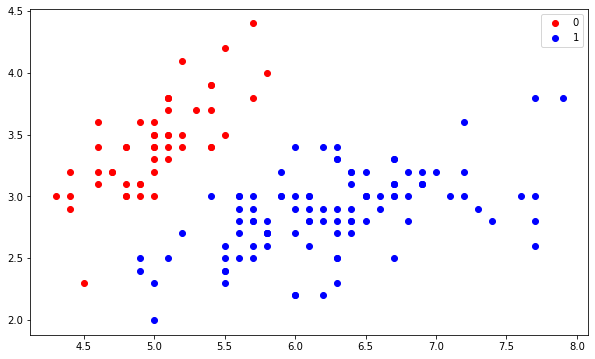

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(x[y==0][:,0], x[y==0][:,1], c='r', label='0')
plt.scatter(x[y==1][:,0], x[y==1][:,1], c='b', label='1')
plt.legend()
plt.show()

In [3]:
N,n_row,n_col,data=read_asc_data('AND.txt')
X = data[:, :-1]
y = data[:, -1]

N=4, row=2, col=1


In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def calc_loss(y_pred, y_true):
    soma = np.sum((y_true * np.log(y_pred) + (1-y_true) * 
                   np.log(1 - y_pred)))
    return -soma/y_pred.size

In [24]:
def gradient(X, y_pred, y_true):
    return np.dot(X.T, (y_pred-y_true))/y_pred.size

In [25]:
def predict(X,w):
#     print(X.shape)
#     print(w.shape)
    return np.dot(X,w)

In [115]:
def fit(X,y, num_iter, lr, loss_min, verbose=50):
    err = []
    curr_epoch = 0
    Xu = np.concatenate((np.ones((X.shape[0],1)),X), axis=1)
    weights = np.zeros(Xu.shape[1])
    
    while curr_epoch <= num_iter:
        # Previsão das labels
        z = predict(Xu,weights)
        h = sigmoid(z)
        
        #print(h)
        # Cálculo da loss
        loss = calc_loss(h, y)
        
        # Cálculo do gradient
        grad = gradient(Xu, h, y)
       # print(grad)
        # Atualização dos pesos
        weights -= lr*grad
        
        if curr_epoch%verbose == 0:
            print(f'Epoch: {curr_epoch} - Loss: {loss}')
#             print(f'Predictions before Sigmoid: {z}')
#             print(f'Predictions: {h}')
#             print(f'Gradient: {grad}')
#             print(f'Weights: {weights}\n')
            
        
        err.append(loss)
        if loss <= loss_min:
            break
        curr_epoch = curr_epoch + 1
    return err, weights

In [113]:
err, weights = fit(x, y, 300000, 0.1, 0)

Epoch: 0 - Loss: 0.6931471805599454


KeyboardInterrupt: 

In [53]:
predictions = predict(np.concatenate((np.ones((x.shape[0],1)),x), axis=1),weights)
predictions_sig = (sigmoid(predictions)).round()

In [54]:
(y == predictions_sig).mean()

1.0

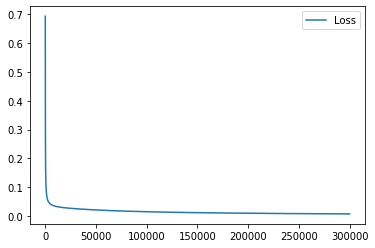

In [58]:
plt.plot(err, label='Loss')
plt.legend(loc='best')
#plt.xticks(np.arange(len(err)))

In [59]:
N,n_row,n_col,data=read_asc_data('./rectangle600.txt')
Xr = data[:, :-1]
yr = data[:, -1]

N=600, row=8, col=8


In [79]:
errr, weightsr = fit(Xr, yr, 1000000, 0.1, 0.1)

Epoch: 0 - Loss: 0.6931471805599453
Epoch: 50000 - Loss: 0.558750770501383
Epoch: 100000 - Loss: 0.5585114874027717
Epoch: 150000 - Loss: 0.5584953517670944
Epoch: 200000 - Loss: 0.5584940274977658
Epoch: 250000 - Loss: 0.5584939088491286
Epoch: 300000 - Loss: 0.5584938977660514
Epoch: 350000 - Loss: 0.5584938967101886
Epoch: 400000 - Loss: 0.558493896608668
Epoch: 450000 - Loss: 0.5584938965988648
Epoch: 500000 - Loss: 0.5584938965979164
Epoch: 550000 - Loss: 0.5584938965978244
Epoch: 600000 - Loss: 0.5584938965978156
Epoch: 650000 - Loss: 0.5584938965978146
Epoch: 700000 - Loss: 0.5584938965978146
Epoch: 750000 - Loss: 0.5584938965978146
Epoch: 800000 - Loss: 0.5584938965978146
Epoch: 850000 - Loss: 0.5584938965978146
Epoch: 900000 - Loss: 0.5584938965978146
Epoch: 950000 - Loss: 0.5584938965978146
Epoch: 1000000 - Loss: 0.5584938965978146


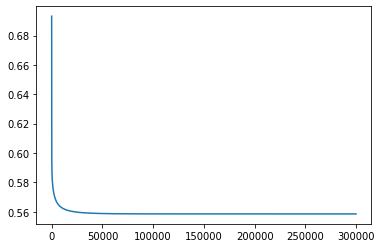

In [67]:
plt.plot(errr)

In [68]:
predictions = predict(np.concatenate((np.ones((Xr.shape[0],1)),Xr), axis=1),weightsr)
predictions_sig = (sigmoid(predictions)).round()

In [70]:
(yr == predictions_sig).mean()

0.7466666666666667

In [132]:
def confusion_matrix(yr,yp):
    matrix = np.zeros((2,2))
    for yr, yp in zip(yr, yp):
        if yr == True:
            if yp == True:
                matrix[0,0] += 1
            else:
                matrix[1,0] += 1
        else:
            if yp == True:
                matrix[0,1] += 1
            else:
                matrix[1,1] += 1
    print(matrix)
    print(f'Recall: {matrix[0,0]/(matrix[0,0]+matrix[1,0])}\nAccuracy: {(matrix[0,0]+matrix[1,1])/np.sum(matrix)}\nPrecision: {matrix[0,0]/(matrix[0,0]+matrix[0,1])}')
            

In [75]:
cmatrix = confusion_matrix(yr, predictions_sig)

In [76]:
cmatrix # LR 0.1 / 300 000 ITER

array([[173.,  67.],
       [ 85., 275.]])

# line1500.txt

In [112]:
N,n_row,n_col,data=read_asc_data('line1500.txt')
x_train = data[750:, :-1]
y_train = data[750:, -1]
x_test = data[:750, :-1]
y_test = data[:750, -1]

N=1500, row=8, col=8


In [135]:
err,weights = fit(x_train, y_train, 100000, 0.1, 0.1, 25000)

Epoch: 0 - Loss: 0.6931471805599454
Epoch: 25000 - Loss: 0.6722191576028033
Epoch: 50000 - Loss: 0.6722177315071157
Epoch: 75000 - Loss: 0.6722177289040565
Epoch: 100000 - Loss: 0.6722177288986538


In [122]:
preds = predict(np.concatenate((np.ones((x_test.shape[0],1)),x_test), axis=1), weights)
preds_ = sigmoid(preds).round()

In [123]:
(preds_ == y_test).mean()

0.512

In [133]:
confusion_matrix(y_test, preds_)

[[160. 159.]
 [207. 224.]]
Recall: 0.4359673024523161
Accuracy: 0.512
Precision: 0.5015673981191222
